In [1]:
import numpy as np
import pandas as pd

In [2]:
cd


C:\Users\user


In [3]:
cd desktop\python\imarticus

C:\Users\user\desktop\python\imarticus


In [4]:
At_data = pd.read_csv('Automobile price data _Raw_.csv')

In [5]:
Data = pd.DataFrame(At_data)

In [6]:
Data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [8]:
Data = Data.replace('?',np.nan)

In [9]:
Data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [10]:
Data['symboling'] = Data['symboling'].abs()# because value doesn't meant to be -ve

In [11]:
Data['symboling'] = pd.to_numeric(Data['symboling'])

In [12]:
Data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [13]:
# we seen that most common type is with four doors so replace nan with four

In [14]:
Data['num-of-doors'] = Data['num-of-doors'].fillna("four")

In [15]:
Data['drive-wheels'] = Data['drive-wheels'].replace(regex = True, to_replace = '[0-9]', value = 'f')
#replacing 4wd here with fwd
Data['drive-wheels'].unique()

array(['rwd', 'fwd'], dtype=object)

In [16]:
Data['fuel-system'].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [17]:
Data['bore'] = Data['bore'].astype('float64') #Data['bore'].fillna(0)
#filled nan with mean of that column bcz.... mostly companies have diffrent bores and so that it is not fell 
#in one of that category so i fill it with mean

In [18]:
Data['bore'] = Data['bore'].fillna(Data['bore'].mean)

In [19]:
Data['stroke'] = Data['stroke'].astype('float64')

In [20]:
Data[Data['horsepower'].isnull()]
# as we have

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9295
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.9,8.7,NaN,NaN,23,31,9895


In [21]:
#Data.groupby(['horsepower','compression-ratio'])[['stroke']].count()
comp1 = Data.groupby('compression-ratio')
comp2 = comp1.get_group(8.7)
comp2
# we don't have proper details for renault company...... so i decided to drop these rows.....

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
130,0,NaN,renault,gas,std,four,wagon,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9295
131,2,NaN,renault,gas,std,two,hatchback,fwd,front,96.1,...,132,mpfi,3.46,3.90,8.7,NaN,NaN,23,31,9895
139,2,83,subaru,gas,std,two,hatchback,fwd,front,93.7,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7053
140,2,83,subaru,gas,std,two,hatchback,fwd,front,93.3,...,108,2bbl,3.62,2.64,8.7,73,4400,26,31,7603
173,1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,29,34,8948
175,1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,9988
176,1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898
177,1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248
201,1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045


In [22]:
Data = Data.drop([130,131])

In [23]:
Data['horsepower'] = Data['horsepower'].astype('int64')

In [24]:
Data['peak-rpm'] = Data['peak-rpm'].astype('int64')

In [25]:
Data[Data['price'].isnull()]
# in the below data we have nan value so to look 
#into that we have to see there similar product of company

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,NaN,audi,gas,turbo,two,hatchback,fwd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [26]:
veh = Data.groupby('make')
veh2 = veh.get_group('audi')
m = veh2['price'][0:6]
#now look into prices of audi - cars
m = m.astype('int64')
mn = m.mean()
# as price to  be min from 25k for audi cars so we assume it as a mean of all products of audi
Data['price'].loc[9] = mn
# as you see that we have Nan values in losses so we have to put avg of losses of that company bcz we don't know exact value
mn2 = (164+158)/2
Data.loc[[5,7,9],['normalized-losses']] = mn2

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [27]:
Data[Data['price'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [28]:
isu = Data.groupby('make')
isu2 = isu.get_group('isuzu')
# as no loss mentioned by isuzu so put it as 0
Data.loc[[43,44,45,46],['normalized-losses']] = 0
#as price is not mentioned so put it as mean of a given prices of a company
isumn = (6785+11048)/2
Data.loc[[44,45],['price']] = isumn
isu2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
43,0,NaN,isuzu,gas,std,four,sedan,rwd,front,94.3,...,111,2bbl,3.31,3.23,8.5,78,4800,24,29,6785
44,1,NaN,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
45,0,NaN,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,NaN
46,2,NaN,isuzu,gas,std,two,hatchback,rwd,front,96.0,...,119,spfi,3.43,3.23,9.2,90,5000,24,29,11048


In [29]:
por = Data.groupby('make')
por2 = por.get_group('porsche')
pors = por2['price'][0:4]
pors = pors.astype('float64')
prmn = pors.mean()
# as one price isn't mention soo put it as mean of other products price
Data.loc[[129],['price']] = prmn
# as on
por2

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018
126,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528
127,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028
128,3,NaN,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,NaN


In [30]:
Data['price'] = Data['price'].astype('float64')

In [31]:
Data[Data['normalized-losses'].isnull()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0
48,0,NaN,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,0,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0
63,0,NaN,mazda,diesel,std,four,sedan,fwd,front,98.8,...,122,idi,3.39,3.39,22.7,64,4650,36,42,10795.0


In [32]:
bm = Data.groupby('make')
bmw = bm.get_group('bmw')
m = bmw['normalized-losses'][0:4] 
m = m.astype('int64')
bmwmn = m.mean()
# as there is some models in which no normalize value given... so i filled it with mean of a prices of particular product
Data.loc[[14,15,16,17],['normalized-losses']] = bmwmn
bmw

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.80,8.8,101,5800,23,29,16430.0
11,0,192,bmw,gas,std,four,sedan,rwd,front,101.2,...,108,mpfi,3.5,2.80,8.8,101,5800,23,29,16925.0
12,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970.0
13,0,188,bmw,gas,std,four,sedan,rwd,front,101.2,...,164,mpfi,3.31,3.19,9.0,121,4250,21,28,21105.0
14,1,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,164,mpfi,3.31,3.19,9.0,121,4250,20,25,24565.0
15,0,NaN,bmw,gas,std,four,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,30760.0
16,0,NaN,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
17,0,NaN,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0


In [33]:
alf = Data.groupby('make')
alf2 = alf.get_group('alfa-romero')
alf2
# as there is no loos mentioned for this company put it as zero
Data.loc[[0,1,2],['normalized-losses']] = 0

In [34]:
jag = Data.groupby('make')
jagu = jag.get_group('jaguar')
# as only one loss so put other same as well
Data.loc[[48,49],['normalized-losses']] = 145
jagu

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
47,0,145,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,32250.0
48,0,NaN,jaguar,gas,std,four,sedan,rwd,front,113.0,...,258,mpfi,3.63,4.17,8.1,176,4750,15,19,35550.0
49,0,NaN,jaguar,gas,std,two,sedan,rwd,front,102.0,...,326,mpfi,3.54,2.76,11.5,262,5000,13,17,36000.0


In [35]:
maz = jag.get_group('mazda')
mazmn = maz['normalized-losses'][0:13]
mazmn = mazmn.astype('int64')
mazmn1 = mazmn.mean()
Data.loc[[63,66],['normalized-losses']] = mazmn1
maz

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
50,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,30,31,5195.0
51,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6095.0
52,1,104,mazda,gas,std,two,hatchback,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6795.0
53,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.03,3.15,9.0,68,5000,31,38,6695.0
54,1,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91,2bbl,3.08,3.15,9.0,68,5000,31,38,7395.0
55,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,<bound method Series.mean of 0 3.47\n1 ...,NaN,9.4,101,6000,17,23,10945.0
56,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,<bound method Series.mean of 0 3.47\n1 ...,NaN,9.4,101,6000,17,23,11845.0
57,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,70,4bbl,<bound method Series.mean of 0 3.47\n1 ...,NaN,9.4,101,6000,17,23,13645.0
58,3,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80,mpfi,<bound method Series.mean of 0 3.47\n1 ...,NaN,9.4,135,6000,16,23,15645.0
59,1,129,mazda,gas,std,two,hatchback,fwd,front,98.8,...,122,2bbl,3.39,3.39,8.6,84,4800,26,32,8845.0


In [36]:
merc = jag.get_group('mercedes-benz')
merc = merc.fillna(0)
merc['normalized-losses'] = merc['normalized-losses'].astype('int64')
mercmn = merc['normalized-losses'].mean()
Data.loc

In [37]:
merc.loc[[71,73,74],['normalized-losses']] = mercmn

In [38]:
mercu = jag.get_group('mercury')
#no mentioned losses
Data.loc[[75],['normalized-losses']] = 0
mercu

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
75,1,NaN,mercury,gas,turbo,two,hatchback,rwd,front,102.7,...,140,mpfi,3.78,3.12,8.0,175,5000,19,24,16503.0


In [39]:
mist = jag.get_group('mitsubishi')
mist1 = pd.notnull(mist['normalized-losses'])
notnull = mist[mist1]
mistmn = notnull['normalized-losses'].astype('int64').mean()
Data.loc[[82,83,84],['normalized-losses']] = mistmn
mist

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
76,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.0
77,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6189.0
78,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.7,...,92,2bbl,2.97,3.23,9.4,68,5500,31,38,6669.0
79,1,161,mitsubishi,gas,turbo,two,hatchback,fwd,front,93.0,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7689.0
80,3,153,mitsubishi,gas,turbo,two,hatchback,fwd,front,96.3,...,110,spdi,3.17,3.46,7.5,116,5500,23,30,9959.0
81,3,153,mitsubishi,gas,std,two,hatchback,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499.0
82,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.58,3.86,7.0,145,5000,19,24,12629.0
83,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14869.0
84,3,NaN,mitsubishi,gas,turbo,two,hatchback,fwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,14489.0
85,1,125,mitsubishi,gas,std,four,sedan,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,6989.0


In [40]:
peo = jag.get_group('peugot')
# as all value are same in normalized column so put it as same as that of value
Data.loc[[109,110,113,114],['normalized-losses']] = 161
peo

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
107,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,11900.0
108,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,13200.0
109,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.0
110,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.7,3.52,21.0,95,4150,25,25,13860.0
111,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,15580.0
112,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,16900.0
113,0,NaN,peugot,gas,std,four,wagon,rwd,front,114.2,...,120,mpfi,3.46,2.19,8.4,95,5000,19,24,16695.0
114,0,NaN,peugot,diesel,turbo,four,wagon,rwd,front,114.2,...,152,idi,3.7,3.52,21.0,95,4150,25,25,17075.0
115,0,161,peugot,gas,std,four,sedan,rwd,front,107.9,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,16630.0
116,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,...,152,idi,3.7,3.52,21.0,95,4150,28,33,17950.0


In [41]:
ply = jag.get_group('plymouth')
plys = ply['normalized-losses'][0:6].astype('int64').mean()
Data.loc[[124],['normalized-losses']] = plys
ply

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
118,1,119,plymouth,gas,std,two,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,37,41,5572.0
119,1,119,plymouth,gas,turbo,two,hatchback,fwd,front,93.7,...,98,spdi,3.03,3.39,7.6,102,5500,24,30,7957.0
120,1,154,plymouth,gas,std,four,hatchback,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6229.0
121,1,154,plymouth,gas,std,four,sedan,fwd,front,93.7,...,90,2bbl,2.97,3.23,9.4,68,5500,31,38,6692.0
122,1,154,plymouth,gas,std,four,sedan,fwd,front,93.7,...,98,2bbl,2.97,3.23,9.4,68,5500,31,38,7609.0
123,1,74,plymouth,gas,std,four,wagon,fwd,front,103.3,...,122,2bbl,3.35,3.46,8.5,88,5000,24,30,8921.0
124,3,NaN,plymouth,gas,turbo,two,hatchback,rwd,front,95.9,...,156,spdi,3.59,3.86,7.0,145,5000,19,24,12764.0


In [42]:
porsch = jag.get_group('porsche')
Data.loc[[126,127,128,129],['normalized-losses']] = 186
porsch

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
125,3,186,porsche,gas,std,two,hatchback,rwd,front,94.5,...,151,mpfi,3.94,3.11,9.5,143,5500,19,27,22018.0
126,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,32528.0
127,3,NaN,porsche,gas,std,two,hardtop,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,34028.0
128,3,NaN,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
129,1,NaN,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,31400.5


In [43]:
toyo = jag.get_group('toyota')
toyo = toyo.fillna(0)
toyomn = toyo['normalized-losses'].astype('int64').mean()
#as value is not mentiioned at index 181 so i put mean of all values..
Data.loc[[181],['normalized-losses']] = toyomn
toyo

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
150,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348.0
151,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338.0
152,1,74,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488.0
153,0,77,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918.0
154,0,81,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898.0
155,0,91,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778.0
156,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938.0
157,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198.0
158,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
159,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788.0


In [44]:
valk = jag.get_group('volkswagen')
valks = pd.notnull(valk['normalized-losses'])
valk1 = valk[valks]
valkmn = valk1['normalized-losses'].astype('int64').mean()
Data.loc[[189,191,192,193],['normalized-losses']] = valkmn
valk

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
182,2,122,volkswagen,diesel,std,two,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7775.0
183,2,122,volkswagen,gas,std,two,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85,5250,27,34,7975.0
184,2,94,volkswagen,diesel,std,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,52,4800,37,46,7995.0
185,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85,5250,27,34,8195.0
186,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,9.0,85,5250,27,34,8495.0
187,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.3,...,97,idi,3.01,3.4,23.0,68,4500,37,42,9495.0
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.4,10.0,100,5500,26,32,9995.0
189,3,NaN,volkswagen,gas,std,two,convertible,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,11595.0
190,3,256,volkswagen,gas,std,two,hatchback,fwd,front,94.5,...,109,mpfi,3.19,3.4,8.5,90,5500,24,29,9980.0
191,0,NaN,volkswagen,gas,std,four,sedan,fwd,front,100.4,...,136,mpfi,3.19,3.4,8.5,110,5500,19,24,13295.0


In [45]:
Data['normalized-losses'] = Data['normalized-losses'].astype('float')

In [46]:
cleanup = {"num-of-doors":     {"four": 4, "two": 2},
                "num-of-cylinders": {"four": 4, "six": 6, "five": 5, "eight": 8,
                                  "two": 2, "twelve": 12, "three":3 }}

In [47]:
Data = Data.replace(cleanup)

In [48]:
Data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,95.0,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,1,95.0,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [49]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  200 non-null    float64
 2   make               203 non-null    object 
 3   fuel-type          203 non-null    object 
 4   aspiration         203 non-null    object 
 5   num-of-doors       203 non-null    int64  
 6   body-style         203 non-null    object 
 7   drive-wheels       203 non-null    object 
 8   engine-location    203 non-null    object 
 9   wheel-base         203 non-null    float64
 10  length             203 non-null    float64
 11  width              203 non-null    float64
 12  height             203 non-null    float64
 13  curb-weight        203 non-null    int64  
 14  engine-type        203 non-null    object 
 15  num-of-cylinders   203 non-null    int64  
 16  engine-size        203 non

In [50]:
tab1 = Data.pivot_table(values = ['normalized-losses'], index = ['make'], aggfunc = 'sum')
# this tbale shows how much automobile company having losses
tab1

,normalized-losses
make,
alfa-romero,0.000000
audi,1127.000000
bmw,1520.000000
chevrolet,300.000000
dodge,1201.000000
honda,1339.000000
isuzu,0.000000
jaguar,435.000000
mazda,2109.153846


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

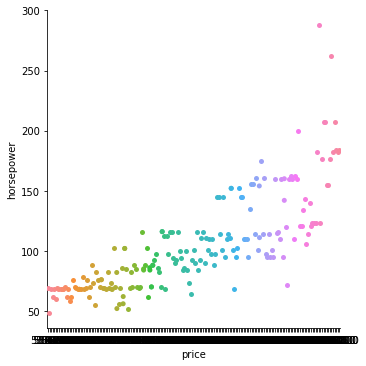

In [52]:
sns.catplot(x = Data['price'],y = Data['horsepower'], data = Data)
#this graph show hoe price is changes with horse power....... as price increases power of vehicle increases

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num-of-doors', ylabel='count'>

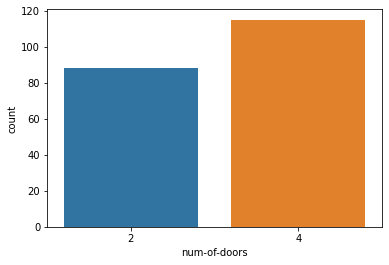

In [53]:
sns.countplot(Data['num-of-doors'])
# below grapdh shows how many vehicle are there of 4 and 2 door

<AxesSubplot:xlabel='make', ylabel='normalized-losses'>

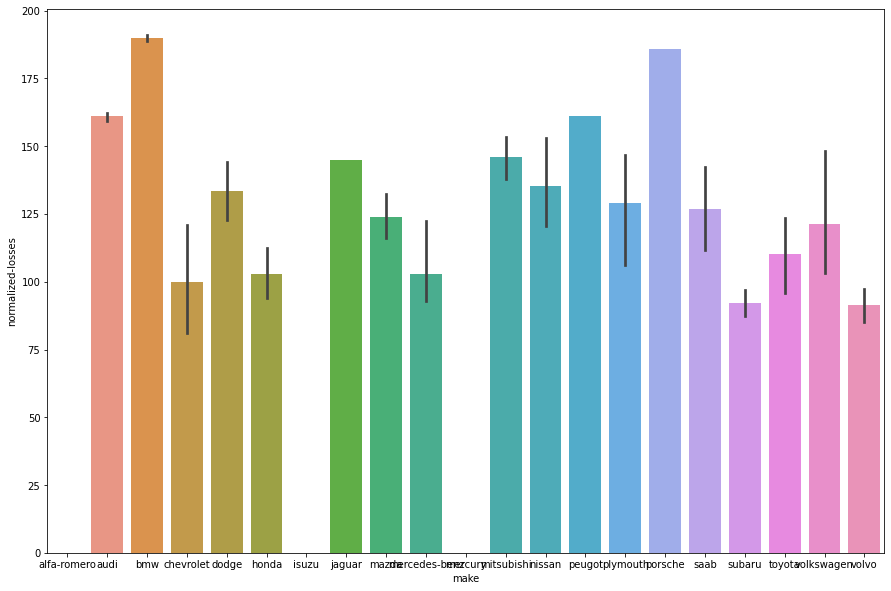

In [54]:
from matplotlib import pyplot 
fig, ax = pyplot.subplots(figsize=(15,10))
sns.barplot(x = Data['make'],y = Data['normalized-losses'])

# below graph shows how company have losses and highest loss is for bmw....

<AxesSubplot:xlabel='num-of-cylinders', ylabel='price'>

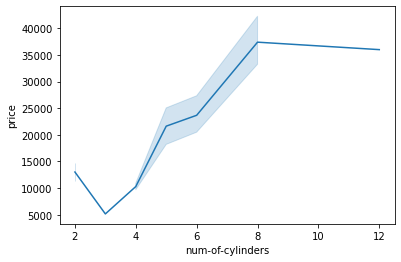

In [55]:
sns.lineplot(x = Data['num-of-cylinders'],y = Data['price'])
#more the num-of cylinder more will be the price

<AxesSubplot:xlabel='price', ylabel='make'>

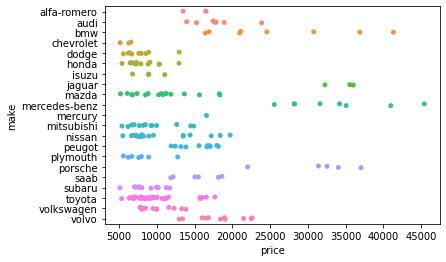

In [56]:
sns.stripplot(x = Data['price'],y = Data['make'])
# below graph shows which product have maximum price and mazda have highest price

<AxesSubplot:xlabel='drive-wheels', ylabel='Count'>

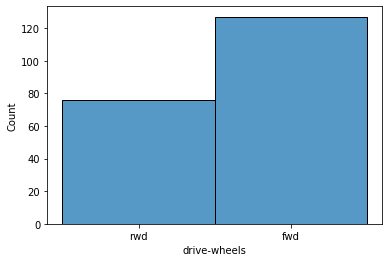

In [57]:
sns.histplot(Data['drive-wheels'])

<AxesSubplot:xlabel='num-of-cylinders', ylabel='horsepower'>

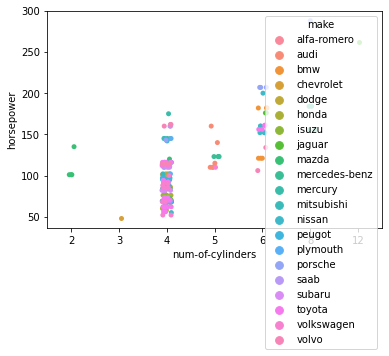

In [58]:
sns.stripplot(x = Data['num-of-cylinders'],y = Data['horsepower'],hue = Data['make'],data = Data)
# below graph show how horse power increasing as num of cylinder increasing

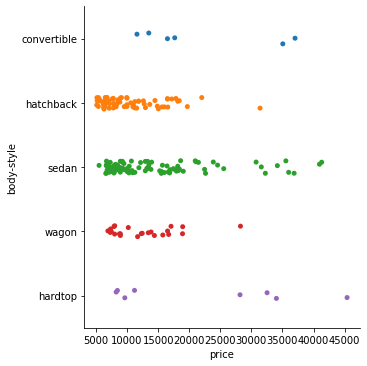

In [59]:
sns.catplot(x = Data['price'], y = Data['body-style'], data =Data)

In [60]:
from scipy.stats import skew
from scipy.stats import kurtosis

In [61]:
Data['price'].skew() #price has postive skewness need more Data for accuracy

1.7620287457021546

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='price'>

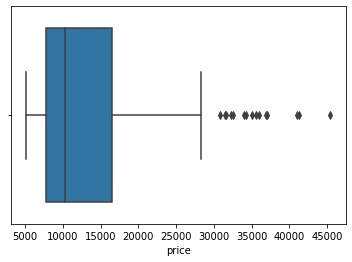

In [62]:
sns.boxplot(Data['price'])

<AxesSubplot:xlabel='peak-rpm', ylabel='horsepower'>

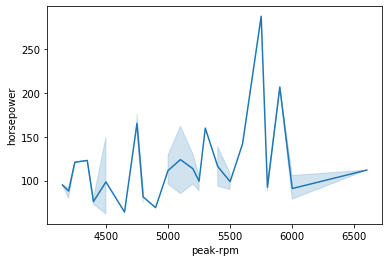

In [63]:
sns.lineplot(x =Data['peak-rpm'],y = Data['horsepower'])
#this shows trend between horsepower and peak-rpm

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='peak-rpm', ylabel='Density'>

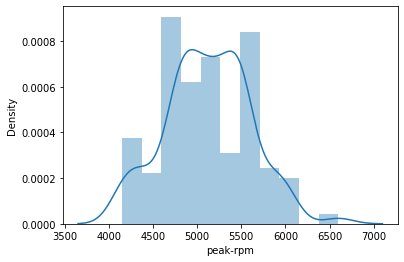

In [64]:
sns.distplot(Data['peak-rpm'])
# th below graph show the trend of peak rpm.... we have mostly cars in between 4500-5200 rpm
# very rare a car have 6500 rpm

In [65]:
Data['peak-rpm'].skew()# it is likely to be approximately accurate/......

0.07323669149378215

c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='engine-location', ylabel='count'>

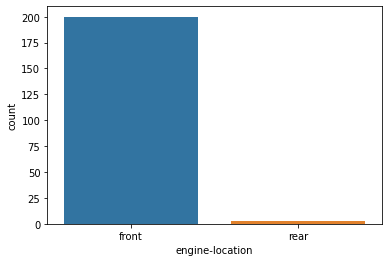

In [87]:
sns.countplot(Data['engine-location'])
# from below graph it is clear that we have front engine is more sucessfull than rear

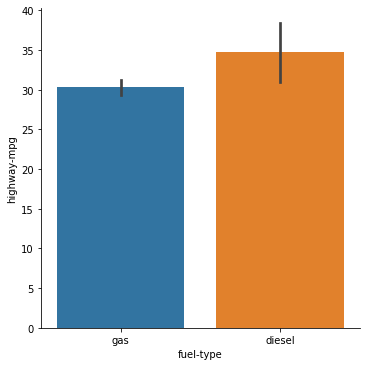

In [90]:
sns.catplot(x=Data["fuel-type"],y=Data["highway-mpg"],data=Data,kind="bar")
# the graph shows diesel have more mileage on hightway as compared to gas

<AxesSubplot:xlabel='fuel-type', ylabel='city-mpg'>

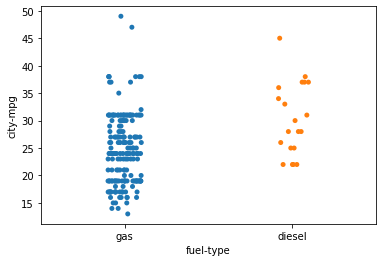

In [95]:
sns.stripplot(x = Data['fuel-type'],y = Data['city-mpg'],data = Data)

In [66]:
Data1 = Data.copy()

In [67]:
Data1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,95.0,volvo,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,95.0,volvo,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,1,95.0,volvo,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [68]:
# now we make transform in make column so that it is easy to undestand by machine

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Data1['make'] = le.fit_transform(Data1['make'])
Data1
# as you see that in make coumn it changes all values with numeric number.

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.0,0,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0.0,0,gas,std,2,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0.0,0,gas,std,2,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164.0,1,gas,std,4,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164.0,1,gas,std,4,sedan,fwd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,95.0,20,gas,std,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,95.0,20,gas,turbo,4,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,95.0,20,gas,std,4,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,1,95.0,20,diesel,turbo,4,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [69]:
le = LabelEncoder()

Data1['fuel-type'] = le.fit_transform(Data1['fuel-type'])
Data1['aspiration'] = le.fit_transform(Data1['aspiration'])
Data1['body-style'] = le.fit_transform(Data1['body-style'])
Data1['drive-wheels'] = le.fit_transform(Data1['drive-wheels'])
Data1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0.0,0,1,0,2,0,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0.0,0,1,0,2,0,1,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0.0,0,1,0,2,2,1,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164.0,1,1,0,4,3,0,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,164.0,1,1,0,4,3,0,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,95.0,20,1,0,4,3,1,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,95.0,20,1,1,4,3,1,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,95.0,20,1,0,4,3,1,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,1,95.0,20,0,1,4,3,1,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [70]:
lb_engloc = pd.get_dummies(Data1['engine-location'])
lb_engloc

,front,rear
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
200,1,0
201,1,0
202,1,0
203,1,0


In [71]:
# now we jjoin the column which we got above for engine location 
# and it is easy to understand by machine so that we calculate accuracy
Data1 = pd.concat([Data1,lb_engloc], axis = 1)

In [72]:
Data1 = Data1.drop('engine-location',axis =1)

In [73]:
Data1['engine-type'] = le.fit_transform(Data1['engine-type'])


In [74]:
Data1['fuel-system'] = le.fit_transform(Data1['fuel-system'])

In [85]:
Data1

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,front,rear
0,3,0.0,0,1,0,2,0,1,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,1,0
1,3,0.0,0,1,0,2,0,1,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,1,0
2,1,0.0,0,1,0,2,2,1,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,1,0
3,2,164.0,1,1,0,4,3,0,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,1,0
4,2,164.0,1,1,0,4,3,0,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,95.0,20,1,0,4,3,1,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,1,0
201,1,95.0,20,1,1,4,3,1,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,1,0
202,1,95.0,20,1,0,4,3,1,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,1,0
203,1,95.0,20,0,1,4,3,1,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,1,0
